# Modul 8 Struktur Data: *Binary Tree* dan berbagai implementasinya

Kembali ke [Struktur Data (dengan Python)](strukdat2023.qmd)

In [16]:
import numpy as np
import graphviz as gv

## Implementasi *binary tree*

### *Binary Tree* dengan *array*

In [2]:
class ArrayBintree:
    def __init__(self, dtype, height, emptydata=-9999):
        self.dtype = dtype
        self.height = height
        self.emptydata = emptydata
        self.array_size = 2**(height+1) - 1
        self.array = np.empty(self.array_size, dtype=dtype)
        for i in range(self.array_size):
            self.array[i] = emptydata

    def get_root(self):
        root_data = self.array[0]
        if root_data == self.emptydata:
            return None
        else:
            return root_data

    def set_root(self, newdata):
        self.array[0] = newdata

    def get_data(self, node_idx):
        if node_idx < self.array_size:
            return self.array[node_idx]
        else:
            print("Error get_data: indeks di luar ukuran tree")
            return None

    def set_data(self, node_idx, newdata):
        if node_idx < self.array_size:
            self.array[node_idx] = newdata
        else:
            print("Error set_data: indeks di luar ukuran tree")

    def get_left_child_idx(self, node_idx):
        left_idx = 2*node_idx + 1
        if left_idx < self.array_size:
            return left_idx
        else:
            return -1

    def get_left_child(self, node_idx):
        left_idx = self.get_left_child_idx(node_idx)
        if left_idx != -1:
            data = self.array[left_idx]
            if data != self.emptydata:
                return data
            else:
                return None
        else:
            return None

    def get_right_child_idx(self, node_idx):
        right_idx = 2*node_idx + 2
        if right_idx < self.array_size:
            return right_idx
        else:
            return -1

    def get_right_child(self, node_idx):
        right_idx = self.get_right_child_idx(node_idx)
        if right_idx != -1:
            data = self.array[right_idx]
            if data != self.emptydata:
                return data
            else:
                return None
        else:
            return None

    def get_parent_idx(self, node_idx):
        if node_idx == 0:
            return -1
        idx = np.floor( (node_idx - 1)/2 )
        return idx

    # preorder: tengah, kiri, kanan
    def get_preorder(self, current=0, result=None):
        is_starting_node = False
        if result == None:
            is_starting_node = True
            result = []

        # tengah
        current_data = self.array[current]
        if current_data != self.emptydata:
            result.append(current_data)

        # kiri
        left_idx = self.get_left_child_idx(current)
        if left_idx != -1:
            self.get_preorder(current=left_idx, result=result)

        # kanan
        right_idx = self.get_right_child_idx(current)
        if right_idx != -1:
            self.get_preorder(current=right_idx, result=result)

        if is_starting_node:
            return result

    # inorder: kiri, tengah, kanan
    def get_inorder(self, current=0, result=None):
        is_starting_node = False
        if result == None:
            is_starting_node = True
            result = []

        # kiri
        left_idx = self.get_left_child_idx(current)
        if left_idx != -1:
            self.get_inorder(current=left_idx, result=result)

        # tengah
        current_data = self.array[current]
        if current_data != self.emptydata:
            result.append(current_data)

        # kanan
        right_idx = self.get_right_child_idx(current)
        if right_idx != -1:
            self.get_inorder(current=right_idx, result=result)

        if is_starting_node:
            return result

    # postorder: kiri, kanan, tengah
    def get_postorder(self, current=0, result=None):
        is_starting_node = False
        if result == None:
            is_starting_node = True
            result = []

        # kiri
        left_idx = self.get_left_child_idx(current)
        if left_idx != -1:
            self.get_postorder(current=left_idx, result=result)

        # kanan
        right_idx = self.get_right_child_idx(current)
        if right_idx != -1:
            self.get_postorder(current=right_idx, result=result)

        # tengah
        current_data = self.array[current]
        if current_data != self.emptydata:
            result.append(current_data)

        if is_starting_node:
            return result

    def get_digraph_simple(self):
        digraph = gv.Digraph()
        for idx in range(self.array_size):
            data = self.array[idx]
            if data != self.emptydata:
                digraph.node("node" + str(idx), label=str(data))
                left_idx = self.get_left_child_idx(idx)
                right_idx = self.get_right_child_idx(idx)
                if left_idx != -1:
                    digraph.edge("node" + str(idx), "node" + str(left_idx))
                    if self.array[left_idx] == self.emptydata:
                        digraph.node("node" + str(left_idx), label="NULL", shape="none")
                if right_idx != -1:
                    digraph.edge("node" + str(idx), "node" + str(right_idx))
                    if self.array[right_idx] == self.emptydata:
                        digraph.node("node" + str(right_idx), label="NULL", shape="none")
        return digraph

In [3]:
arraybintree = ArrayBintree(int, 2)

In [4]:
print(arraybintree.array)

[-9999 -9999 -9999 -9999 -9999 -9999 -9999]


In [5]:
arraybintree.set_root(10)

In [6]:
print(arraybintree.array)

[   10 -9999 -9999 -9999 -9999 -9999 -9999]


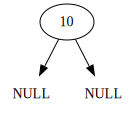

In [7]:
display(arraybintree.get_digraph_simple())

In [8]:
arraybintree.set_data(
    arraybintree.get_left_child_idx(0),
    5
)

In [9]:
print(arraybintree.array)

[   10     5 -9999 -9999 -9999 -9999 -9999]


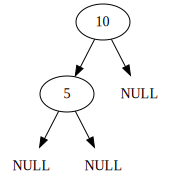

In [10]:
display(arraybintree.get_digraph_simple())

In [11]:
arraybintree.set_data(
    arraybintree.get_right_child_idx(0),
    19
)

In [12]:
print(arraybintree.array)

[   10     5    19 -9999 -9999 -9999 -9999]


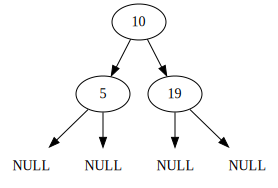

In [13]:
display(arraybintree.get_digraph_simple())

In [14]:
arraybintree.set_data(
    arraybintree.get_right_child_idx(arraybintree.get_left_child_idx(0)),
    37
)

In [15]:
print(arraybintree.array)

[   10     5    19 -9999    37 -9999 -9999]


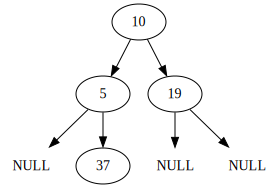

In [16]:
display(arraybintree.get_digraph_simple())

In [17]:
arraybintree.get_data(
    arraybintree.get_right_child_idx(arraybintree.get_left_child_idx(0))
)

37

In [18]:
arraybintree.array[5] = 98
arraybintree.array[6] = 62

In [19]:
print(arraybintree.array)

[   10     5    19 -9999    37    98    62]


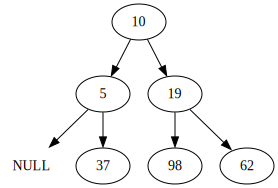

In [20]:
display(arraybintree.get_digraph_simple())

In [21]:
arraybintree.array[3] = 25

In [22]:
print(arraybintree.array)

[10  5 19 25 37 98 62]


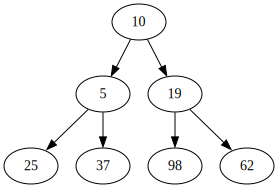

In [23]:
display(arraybintree.get_digraph_simple())

In [24]:
arraybintree.get_preorder()

[10, 5, 25, 37, 19, 98, 62]

In [25]:
arraybintree.get_inorder()

[25, 5, 37, 10, 98, 19, 62]

In [27]:
arraybintree.get_postorder()

[25, 37, 5, 98, 62, 19, 10]

### *Binary Tree* dengan *pointer* (*linked binary tree*)

In [17]:
class BintreeNode:
    def __init__(self, data, left=None, right=None):
        self.data = data
        self.left = left
        self.right = right

In [41]:
class LinkedBintree:
    def __init__(self):
        self.root = None

    def is_empty(self):
        if self.root == None:
            return True
        else:
            return False

    def get_root_data(self):
        if self.is_empty():
            print("Error get_root_data: tree sedang kosong")
            return None
        else:
            return self.root.data

    def set_root_data(self, newdata):
        if self.is_empty():
            self.root = BintreeNode(newdata)
        else:
            self.root.data = newdata

    # preorder: tengah, kiri, kanan
    def get_preorder(self, current=None, result=None, get_addresses=False):
        is_starting_node = False
        if result == None:
            is_starting_node = True
            result = []
            current = self.root

        if current != None:
            # tengah
            if (not get_addresses):
                result.append(current.data)
            else:
                result.append(current)

            # kiri
            if current.left != None:
                self.get_preorder(current.left, result=result)
            
            # kanan
            if current.right != None:
                self.get_preorder(current.right, result=result)

        if is_starting_node:
            return result

    # inorder: kiri, tengah, kanan
    def get_inorder(self, current=None, result=None, get_addresses=False):
        is_starting_node = False
        if result == None:
            is_starting_node = True
            result = []
            current = self.root

        if current != None:
            # kiri
            if current.left != None:
                self.get_inorder(current.left, result=result)
            
            # tengah
            if (not get_addresses):
                result.append(current.data)
            else:
                result.append(current)

            # kanan
            if current.right != None:
                self.get_inorder(current.right, result=result)

        if is_starting_node:
            return result

    # postorder: kiri, kanan, tengah
    def get_postorder(self, current=None, result=None, get_addresses=False):
        is_starting_node = False
        if result == None:
            is_starting_node = True
            result = []
            current = self.root

        if current != None:
            # kiri
            if current.left != None:
                self.get_postorder(current.left, result=result)
            
            # kanan
            if current.right != None:
                self.get_postorder(current.right, result=result)

            # tengah
            if (not get_addresses):
                result.append(current.data)
            else:
                result.append(current)

        if is_starting_node:
            return result

    # berdasarkan algoritma preorder traversal :D
    def get_digraph_simple(self, current=None, node_name=None, result=None):
        is_starting_node = False
        if result == None:
            is_starting_node = True
            result = gv.Digraph()
            current = self.root
            node_name = "root"
        
        if current != None:
            # tengah
            result.node(node_name, label=str(current.data))

            # kiri
            left_name = node_name + "->left"
            result.edge(node_name, left_name)
            self.get_digraph_simple(
                current=current.left, node_name=left_name, result=result
            )
            
            # kanan
            right_name = node_name + "->right"
            self.get_digraph_simple(
                current=current.right, node_name=right_name, result=result
            )
            result.edge(node_name, right_name)
        else:
            result.node(node_name, label="NULL", shape="none")
        
        if is_starting_node:
            return result

In [42]:
linkedbintree = LinkedBintree()

In [43]:
print(linkedbintree.root)

None


In [44]:
linkedbintree.root = BintreeNode(26)

In [45]:
print(linkedbintree.root)

In [46]:
print(linkedbintree.root.data)

26


In [47]:
linkedbintree.root.left = BintreeNode(89)
linkedbintree.root.right = BintreeNode(54)

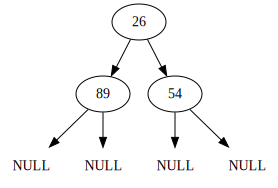

In [48]:
display(linkedbintree.get_digraph_simple())

In [49]:
linkedbintree.root.left.right = BintreeNode(43)

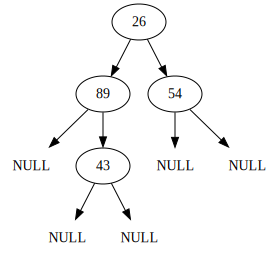

In [50]:
display(linkedbintree.get_digraph_simple())

In [51]:
print(linkedbintree.root.left.right.data)

43


In [52]:
linkedbintree.root.left.left = BintreeNode(11)
linkedbintree.root.right.left = BintreeNode(72)
linkedbintree.root.right.right = BintreeNode(35)

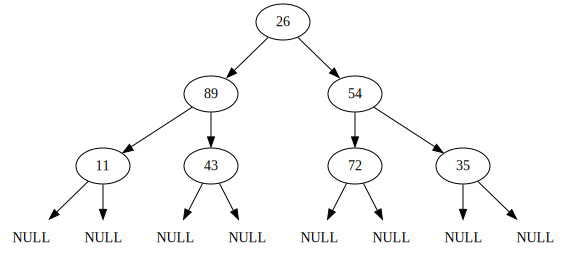

In [53]:
display(linkedbintree.get_digraph_simple())

In [54]:
linkedbintree.get_preorder()

[26, 89, 11, 43, 54, 72, 35]

In [55]:
linkedbintree.get_inorder()

[11, 89, 43, 26, 72, 54, 35]

In [56]:
linkedbintree.get_postorder()

[11, 43, 89, 72, 35, 54, 26]

## (TODO) `LinkedBintree` dari *preorder*, *inorder*, dan/atau *postorder*

### (TODO) `LinkedBintree` dari *preorder* dan *inorder*

In [ ]:
def linkedbintree_from_preorder_inorder(
        preorder, inorder, current_root=None, is_starting_node=True
    ):
    # 1. Di antara semua elemen inorder, mana yang paling kiri di preorder?
    # Simpan index inorder nya
    selesai = False
    for elemen_preorder in preorder:
        # lihat tiap elemen preorder dari kiri ke kanan,
        # dan untuk tiap elemen preorder, periksa satu-satu apakah sama dengan
        # salah satu elemen inorder
        inorder_idx = 0
        while (inorder_idx < len(inorder)) and (not selesai):
            if inorder[inorder_idx] == elemen_preorder:
                selesai = True
            else:
                inorder_idx += 1
        if selesai:
            break
    
    # 2. Buatlah node dengan data di index tersebut di inorder.
    # Kalau belum ada root (karena LinkedBintree belum dibentuk sama sekali),
    # buatlah objek LinkedBintree dengan rootnya adalah node tersebut
    if is_starting_node:
        result = LinkedBintree()
        current_root = BintreeNode(preorder[0])
        result.root = current_root
    else:
        current_root = BintreeNode(inorder[inorder_idx])

    # 3. Pisah inorder menjadi dua bagian,
    # yaitu sebelah kiri dari elemen inorder_idx dan sebelah kanan darinya
    inorder_left = inorder[:inorder_idx]
    inorder_right = inorder[(inorder_idx+1):]

    current_root.left = linkedbintree_from_preorder_inorder(
        preorder, inorder_left, current_root.left, # perlu revisi
        is_starting_node=False
    )
    current_root.right = linkedbintree_from_preorder_inorder(
        preorder, inorder_right, current_root.right, # perlu revisi
        is_starting_node=False
    )

    if is_starting_node:
        return result
    else:
        return current_root

### (TODO) `LinkedBintree` dari *postorder* dan *inorder*

### (TODO) `LinkedBintree` dari *preorder* dan *postorder*

## (TODO) *Binary Search Tree* (BST)

*Binary Search Tree* (BST) adalah *binary tree* dengan beberapa sifat dan fitur tambahan. Sehingga, untuk implementasi BST, kita cukup menambahkan beberapa *method* ke `class` *binary tree* yang sudah dibuat. Daripada mengetik ulang semua *method* yang sudah dibuat di `class` *binary tree*, kita bisa menerapkan salah satu prinsip OOP yaitu *inheritance*, agar langsung mewariskan semua fitur yang sudah dibuat di implementasi *binary tree*.

### (TODO) BST dengan *array*

In [ ]:
class ArrayBST(ArrayBintree):
    def __init__(self, dtype, height, emptydata=-9999):
        # menggunakan __init__ dari parent class,
        # melalui super() yaitu parent class
        super().__init__(dtype, height, emptydata)
    
    # semua method dari ArrayBintree otomatis sudah terdefinisi

    # (TODO) convert binary tree jadi BST

    # (TODO) insertion, deletion

### (TODO) BST dengan *pointer* (*linked* BST)

In [ ]:
class LinkedBST(LinkedBintree):
    def __init__(self):
        # menggunakan __init__ dari parent class,
        # melalui super() yaitu parent class
        super().__init__()
    
    # semua method dari LinkedBintree otomatis sudah terdefinisi

    # (TODO) convert binary tree jadi BST

    # (TODO) insertion, deletion

## (TODO) (Pengayaan) *$m$-ary tree*